## Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<nav class="toc">
  <h1>Содержание:</h1>
  <ul>
    <li><a href="#step1">Шаг 1.  Открытие файлов с данными и изучение общей информации</a>
  </ul>
    <ul>
    <li><a href="#step2">Шаг 2.  Предобработка данных</a>
        <ul>
        <li><a href="#step2.1">2.1. Приведение к нужным типам данных, обработка пропусков, удаление выбросов</a>
        <li><a href="#step2.2">2.2. Группировка данных, добавление необходимых признаков</a>    
        </ul>    
  </ul>
  <ul>
  <li><a href="#step3">Шаг 3. Анализ данных</a>
  </ul>
  <ul>    
  <li><a href="#step4">Шаг 4. Проверка гипотез</a>
  <li><a href="#step5">Шаг 5. Общий вывод</a>
  </ul>
</nav>

### Шаг 1. Открытие файлов с данными и изучение общей информации <a id='step1'></a>

In [285]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats as st
import datetime as dt
import calendar

#откроем файлы с входящей информацией и запишем их в переменные
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

#список переменных с необходимыми датафреймами
info_list = [calls, internet, messages, tariffs, users]

#отобразим информацию о каждом датафрейме
for data in info_list:
    display(data.head(), data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


None

В столбцах датафреймов заключены следующие признаки:

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод
<i> В загруженном датафрейме с информацией о пользователях выборка с 500 записями уникальных клиентов. В таблицах по каждому типу услуг (интернет, вызовы, сообщения) есть общий столбец 'user_id' по которому в дальнейшем будет возможность объединить датафреймы. В большинстве столбцов таблиц уже применен нужный тип данных. Исключение составляют столбцы с датами, их предстоит перевести в формат даты. Кроме того, судя по условиям тарифа, следует округлить и изменить тип данных в признаках затраченного траффика и минут. Также в датафрейме users большое количество пропусков в признаке 'churn_date', очевидно, что многие пользователи продолжают пользоваться тарифом.</i>

### Шаг 2. Подготовка данных <a id='step2'></a>

#### 2.1. Приведение к нужным типам данных, обработка пропусков, удаление выбросов <a id='step2.1'></a>

Напишем две функции. Первая выводит информацию датафрейму и выводит на экран первые 5 строк. Вторая строит гистограмму по необходимому признаку.

In [286]:
def data_info(data):
    display(data.head(5))
    display(data.describe())
         
def hist(data, column, title, xlabel):
    """
    функция, выводящая гистограмму и диаграмму размаха для определенного признака
    
    """
    #найдем первый и третий квартили
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    #найдем межквартильный размах
    IQR = Q3 - Q1
    data.boxplot(column, figsize = (7, 7))
    plt.title(title)
    plt.ylabel(xlabel);
    data.hist(column, bins = 50, range = (0, Q3+3*IQR), figsize = (15, 7))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Кол-во')

Первым рассмотрим датафрейм с информацией по вызовам (calls):

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


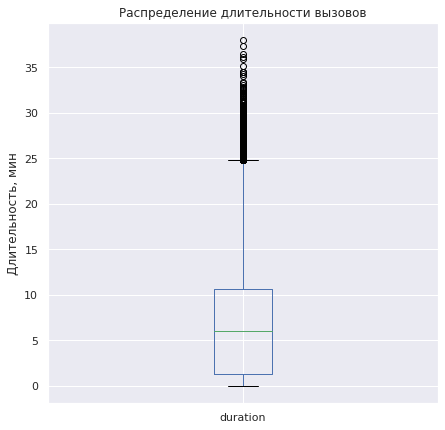

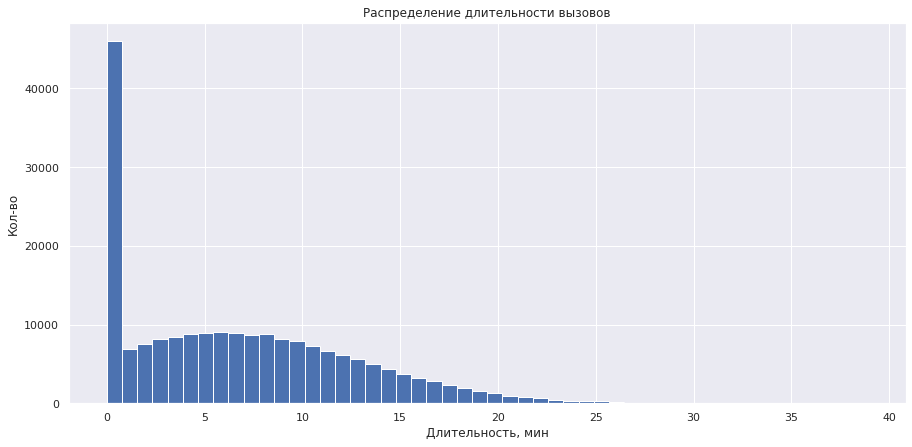

In [287]:
data_info(calls)
title1 = 'Распределение длительности вызовов'
xlabel1 = 'Длительность, мин'
hist(calls, 'duration', title1, xlabel1)

Видно, что большинство звонков попадает в диапазон от 0 до 25 минут (третий квартиль). На гистограмме видим большое количество звонков длительностью около 0с, проверим их количество.

In [288]:
calls[calls['duration'] == 0]['duration'].count()

39613

Получаем большое количество вызовов длительность 0с, скорее всего, это - пропущенные и сброшенные вызовы. По моему мнению, их можно безболезненно удалить, так как никакой информации о возможной длительности вызова они не несут. В то же время вызовы длительность от 1с считаю возможным оставить, так как такие короткие вызовы вполне вероятны, за это время вполне возможно ответить что-то быстрое, вроде "я перезвоню".</br>
Округлим длительность вызова до минуты, как это подразумевает тариф.

Отсортируем значения длительности вызовов по убыванию и рассмотрим 15 последних.

In [289]:
#применим фнукцию np.ceil к столбцу для округления вверх
calls['duration_round'] = calls['duration'].apply(np.ceil).astype('int')
#выведем первые строки измененного датафрейма
calls.head()

,id,call_date,duration,user_id,duration_round
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6


In [290]:
calls['duration_round'].value_counts().sort_index().tail(15)

24    468
25    363
26    257
27    151
28    104
29     56
30     39
31     30
32     17
33     10
34      3
35      5
36      2
37      2
38      2
Name: duration_round, dtype: int64

Значения выше 28 практически единичны, можно от них избавиться. Так же, как и от нулевых значений, ранее признанных артефактами.

In [291]:
#отфильтруем датафрейм при помощи функции query
data_calls = calls.query('duration_round > 0 and duration_round < 29').reset_index()
data_calls

,index,id,call_date,duration,user_id,duration_round
0,2,1000_2,2018-06-11,2.85,1000,3
1,3,1000_3,2018-09-21,13.80,1000,14
2,4,1000_4,2018-12-15,5.18,1000,6
3,7,1000_7,2018-08-22,18.31,1000,19
4,8,1000_8,2018-09-15,18.44,1000,19
...,...,...,...,...,...,...
162823,202602,1499_215,2018-12-26,0.76,1499,1
162824,202603,1499_216,2018-10-18,18.83,1499,19
162825,202604,1499_217,2018-11-10,10.81,1499,11
162826,202605,1499_218,2018-10-06,4.27,1499,5


Для изменения формата даты напишем функцию months.

In [292]:
def months(data, column):
    """
    функция переводит формат столбца в формат даты и добавляет новый столбец с месяцем, в котором произошло событие
    
    """
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')
    data['month'] = data[column].values.astype('datetime64[M]')

#применим функцию к датафрейму calls
months(data_calls, 'call_date')
calls.head()

,id,call_date,duration,user_id,duration_round
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6


Перейдем к датафрейму users с информацией о пользователях.

In [293]:
#применим функцию data_info
data_info(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Найдем первый и последний месяцы выборки.

In [294]:
min_month = data_calls['call_date'].values.astype('datetime64[M]').min()
max_month = data_calls['call_date'].values.astype('datetime64[M]').max()
display(min_month, max_month)

numpy.datetime64('2018-01')

numpy.datetime64('2018-12')

Создадим список со всеми месяцами между первым и последним.

In [295]:
month_list = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
month_list.columns = ['month']
month_list

,month
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


Добавим общие столбцы в датафреймы users и month_list.

In [296]:
month_list['key'] = 1
users['key'] = 1
#проверим величину произведения длин датфреймов
len(users) * len(month_list)

6000

Произведем кроссджойн двух датафреймов по добавленным столбцам.

In [297]:
data_users = month_list.merge(users,on='key')
data_users.head()

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,2018-01-01,1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,2018-01-01,1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,2018-01-01,1,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,2018-01-01,1,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,2018-01-01,1,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Проверим получившийся результат по длине датафрейма.

In [298]:
len(data_users)

6000

Все ок. Теперь стоит удалить записи пользователей по месяцам до их регистрации и после отказа от тарифа.

In [299]:
#изменим формат столбца на формат даты
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
#добавим столбец с месяцем регистрации
data_users['reg_month'] = data_users['reg_date'].values.astype('datetime64[M]')
#добавим столбец с месяцем отказа от тарифа
data_users['churn_month'] = data_users['churn_date'].values.astype('datetime64[M]')
#заполним пропуски месяцем, следующим за последним в списке
data_users['churn_month'] = data_users['churn_month'].fillna(pd.to_datetime(
    '2019-01-01', format='%Y-%m-%d'))
#проверим, сколько строк должно остаться
len(data_users[(data_users['month'] >= data_users['reg_month']) & 
               (data_users['month']<= data_users['churn_month'])])

3216

Отфильтруем датафрейм по выше указанным условиям.

In [300]:
data_users = (data_users[(data_users['month'] >= data_users['reg_month']) 
                         & (data_users['month']<= data_users['churn_month'])].reset_index())
data_users

,index,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,5,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-01,2019-01-01
1,32,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,2018-01-01,2019-01-01
2,45,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,2018-01-01,2019-01-01
3,55,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,2018-01-01,2019-01-01
4,71,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,5994,2018-12-01,1,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,2018-08-01,2019-01-01
3212,5995,2018-12-01,1,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,2018-08-01,2019-01-01
3213,5996,2018-12-01,1,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,2018-01-01,2019-01-01
3214,5997,2018-12-01,1,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,2018-10-01,2019-01-01


Уберем ненужные для исследования признаки.

In [301]:
data_users_final = data_users[['month', 'user_id', 'reg_date', 'tariff', 'city']]
data_users_final

,month,user_id,reg_date,tariff,city
0,2018-01-01,1005,2018-01-25,smart,Набережные Челны
1,2018-01-01,1032,2018-01-04,smart,Ульяновск
2,2018-01-01,1045,2018-01-30,smart,Улан-Удэ
3,2018-01-01,1055,2018-01-02,smart,Казань
4,2018-01-01,1071,2018-01-09,smart,Омск
...,...,...,...,...,...
3211,2018-12-01,1494,2018-08-17,smart,Омск
3212,2018-12-01,1495,2018-08-28,ultra,Иркутск
3213,2018-12-01,1496,2018-01-27,smart,Вологда
3214,2018-12-01,1497,2018-10-09,smart,Челябинск


Проверим результат на конкретном пользователе.

In [302]:
data_users[data_users['user_id'] == 1000]

,index,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
406,2000,2018-05-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2019-01-01
614,2500,2018-06-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2019-01-01
862,3000,2018-07-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2019-01-01
1154,3500,2018-08-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2019-01-01
1496,4000,2018-09-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2019-01-01
1871,4500,2018-10-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2019-01-01
2288,5000,2018-11-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2019-01-01
2738,5500,2018-12-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2019-01-01


Далее рассмотрим датафрейм internet.

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


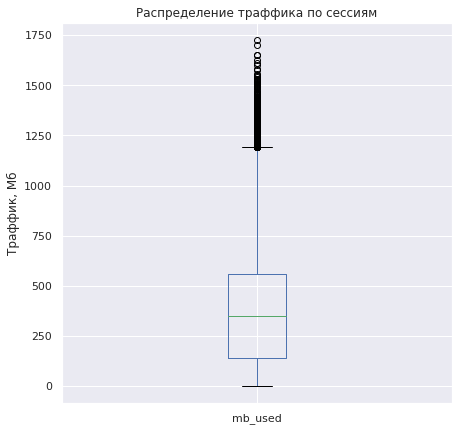

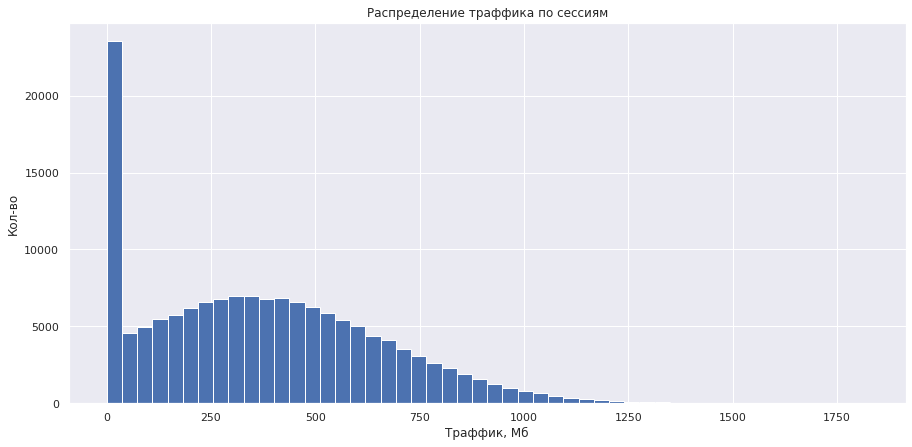

In [303]:
#применим функцию data_info к датафрейму
data_info(internet)
title2 = 'Распределение траффика по сессиям'
xlabel2 = 'Траффик, Мб'
hist(internet, 'mb_used', title2, xlabel2)

Наблюдаем нормальное распределение со странным пиком около нулевых значений.</br>
Округлим значения траффика согласно условиям тарифа и выведем количество сессий в нулевым траффиком.

In [304]:
#округляем траффик по сессиям вверх, заодно изменив тип данных
internet['mb_round'] = internet['mb_used'].apply(np.ceil).astype('int')
#проверим результат
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,mb_round
0,0,1000_0,112.95,2018-11-25,1000,113
1,1,1000_1,1052.81,2018-09-07,1000,1053
2,2,1000_2,1197.26,2018-06-25,1000,1198
3,3,1000_3,550.27,2018-08-22,1000,551
4,4,1000_4,302.56,2018-09-24,1000,303


In [305]:
internet[internet['mb_round'] == 0]['mb_round'].count()

19598

Видим большое количество пустых сессий. Возможно, это какая-то ошибка учета траффика или ошибка подключения.
В любом случае, данные сессии стоит удалить, практической пользы от них нет, только искажение результатов.
Также удалим единичные значения сессий выше 1250мб.

In [306]:
data_internet = internet.query('mb_round > 0 and mb_round < 1250').reset_index()
data_internet

,index,Unnamed: 0,id,mb_used,session_date,user_id,mb_round
0,0,0,1000_0,112.95,2018-11-25,1000,113
1,1,1,1000_1,1052.81,2018-09-07,1000,1053
2,2,2,1000_2,1197.26,2018-06-25,1000,1198
3,3,3,1000_3,550.27,2018-08-22,1000,551
4,4,4,1000_4,302.56,2018-09-24,1000,303
...,...,...,...,...,...,...,...
129492,149390,149390,1499_151,752.72,2018-10-11,1499,753
129493,149391,149391,1499_152,318.90,2018-10-03,1499,319
129494,149392,149392,1499_153,490.13,2018-12-14,1499,491
129495,149394,149394,1499_155,1246.32,2018-11-26,1499,1247


Добавим столбец с месяцем сессии.

In [307]:
months(data_internet, 'session_date')
data_internet.head()  

,index,Unnamed: 0,id,mb_used,session_date,user_id,mb_round,month
0,0,0,1000_0,112.95,2018-11-25,1000,113,2018-11-01
1,1,1,1000_1,1052.81,2018-09-07,1000,1053,2018-09-01
2,2,2,1000_2,1197.26,2018-06-25,1000,1198,2018-06-01
3,3,3,1000_3,550.27,2018-08-22,1000,551,2018-08-01
4,4,4,1000_4,302.56,2018-09-24,1000,303,2018-09-01


Далее рассмотрим датафрейм с отправленными сообщениями (messages).

In [308]:
#применим функцию data_info к датафрейму
data_info(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [309]:
#добавим столбец с месяцем отправленного сообщения
months(messages, 'message_date')
messages.head() 

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


Построим гистограмму распределения отправленных сообщений по месяцам.

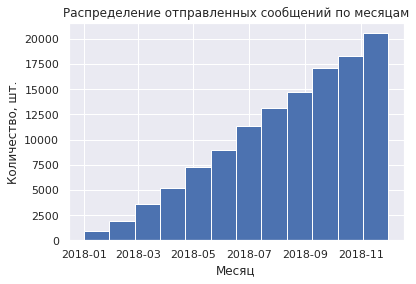

In [310]:
messages['month'].hist(bins = 12)
plt.xlabel('Месяц')
plt.ylabel('Количество, шт.')
plt.title('Распределение отправленных сообщений по месяцам');

Количество сообщений растет с каждым месяцем, похоже, из-за постоянного присоединения новых пользователей.
Каких-то манипуляций с данным датафреймом производить не нужно.

В заключение рассмотрим таблицу с характеристиками тарифов.

In [311]:
#применим функцию data_info к датафрейму
data_info(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Есть признак tariff_name по которому можно будет объединить с таблицей data_users. Стоит дать ему такое же имя, как в data_users.

In [312]:
#переименуем столбец
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']
#проверим результат
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Вывод
<i> При исследовании основных параметров информации об услугах сотовых операторов были применены следующие изменения:
- в датафреймах с количественными переменными (internet, calls, messages) были добавлены признаки месяца совершенного события;
- в таблице calls были удалены нулеые значения и значения выше 28 минут как выбросы
- в таблице internet аналогичным образом удалены нулеые значения и значения сессий более 1250Мб
- в таблице users добавлен признак месяца совершненого события и проведена фильтрация месяцев пользователей, зарегистрированных позднее месяца события, и отказавшихся от тарифа до месяца совершенного события </i>

#### 2.2. Группировка данных, добавление необходимых признаков <a id='step2.2'></a>

Сгруппируем датафрейм calls по пользователям('user_id') и месяцам('month').
В качестве столбцов возьмем количество звонков, совершенных пользователем в месяц и их длительность.

In [313]:
calls_grouped = data_calls.pivot_table(index = ['user_id', 'month'], 
                                             values = 'duration_round',
                                             aggfunc = {'sum', 'count'})
calls_grouped

count  sum
user_id month                 
1000    2018-05-01     17  159
        2018-06-01     28  172
        2018-07-01     41  340
        2018-08-01     42  408
        2018-09-01     46  466
...                   ...  ...
1498    2018-10-01     30  247
1499    2018-09-01      8   70
        2018-10-01     44  449
        2018-11-01     62  612
        2018-12-01     56  492

[3168 rows x 2 columns]

Сравним контрольные суммы длительность звонков до и после группировки.

In [314]:
data_calls['duration_round'].sum()

1445204

In [315]:
calls_grouped['sum'].sum()

1445204

Все ок. Теперь сгруппируем интернет траффик по пользователям и месяцам.

In [316]:
internet_grouped = data_internet.pivot_table(index = ['user_id', 'month'], 
                                             values = 'mb_round',
                                             aggfunc = 'sum')
internet_grouped

mb_round
user_id month               
1000    2018-05-01      2256
        2018-06-01     23257
        2018-07-01     14016
        2018-08-01     14070
        2018-09-01     14581
...                      ...
1498    2018-10-01     20604
1499    2018-09-01      1848
        2018-10-01     17809
        2018-11-01     16696
        2018-12-01     13077

[3201 rows x 1 columns]

Проведем аналогичное сравнение контрольных сумм.

In [317]:
data_internet['mb_round'].sum()

54962663

In [318]:
internet_grouped['mb_round'].sum()

54962663

Аналогично сгруппируем сообщения по пользователям и месяцам.

In [319]:
messages_grouped = messages.pivot_table(index = ['user_id', 'month'], 
                                             values = 'message_date',
                                             aggfunc = 'count')
messages_grouped

message_date
user_id month                   
1000    2018-05-01            22
        2018-06-01            60
        2018-07-01            75
        2018-08-01            81
        2018-09-01            57
...                          ...
1498    2018-10-01            42
1499    2018-09-01            11
        2018-10-01            48
        2018-11-01            59
        2018-12-01            66

[2717 rows x 1 columns]

Сравним контрольные суммы.

In [320]:
messages['message_date'].count()

123036

In [321]:
messages_grouped['message_date'].sum()

123036

Отлично. Теперь можно объединить сгруппированные таблицы с таблицей, содержащей информацию о пользователях. 

In [322]:
#объединим таблицы при помощи функции merge по общему столбцу 'user_id'
data = data_users_final.merge(calls_grouped, on = ['user_id', 'month'], how = 'outer'
                             ).merge(internet_grouped, on = ['user_id', 'month'], how = 'outer'
                                    ).merge(messages_grouped, on = ['user_id', 'month'], how = 'outer'
                                           ).sort_values(by = 'user_id')
data

,month,user_id,reg_date,tariff,city,count,sum,mb_round,message_date
1154,2018-08-01,1000,2018-05-25,ultra,Краснодар,42.0,408.0,14070.0,81.0
2288,2018-11-01,1000,2018-05-25,ultra,Краснодар,37.0,338.0,12153.0,58.0
1871,2018-10-01,1000,2018-05-25,ultra,Краснодар,44.0,350.0,14717.0,73.0
614,2018-06-01,1000,2018-05-25,ultra,Краснодар,28.0,172.0,23257.0,60.0
1496,2018-09-01,1000,2018-05-25,ultra,Краснодар,46.0,466.0,14581.0,57.0
...,...,...,...,...,...,...,...,...,...
1153,2018-07-01,1498,2018-07-19,smart,Владикавказ,20.0,175.0,7486.0,20.0
2737,2018-11-01,1499,2018-09-27,smart,Пермь,62.0,612.0,16696.0,59.0
1870,2018-09-01,1499,2018-09-27,smart,Пермь,8.0,70.0,1848.0,11.0
2287,2018-10-01,1499,2018-09-27,smart,Пермь,44.0,449.0,17809.0,48.0


Добавим столбец с округленным траффиком в Гб.

In [323]:
#применим к столбцу 'mb_round' функцию np.ceil
data['gb_round'] = (data['mb_round'] / 1024).apply(np.ceil)
data.columns = ['month', 'user_id', 'reg_date', 'tariff', 'city', 'count', 'sum', 'mb_round',
       'message_date', 'gb_round']


Проверим полученный результат на выборке из конкретного пользователя.

In [324]:
data[data['user_id'] == 1000]

,month,user_id,reg_date,tariff,city,count,sum,mb_round,message_date,gb_round
1154,2018-08-01,1000,2018-05-25,ultra,Краснодар,42.0,408.0,14070.0,81.0,14.0
2288,2018-11-01,1000,2018-05-25,ultra,Краснодар,37.0,338.0,12153.0,58.0,12.0
1871,2018-10-01,1000,2018-05-25,ultra,Краснодар,44.0,350.0,14717.0,73.0,15.0
614,2018-06-01,1000,2018-05-25,ultra,Краснодар,28.0,172.0,23257.0,60.0,23.0
1496,2018-09-01,1000,2018-05-25,ultra,Краснодар,46.0,466.0,14581.0,57.0,15.0
862,2018-07-01,1000,2018-05-25,ultra,Краснодар,41.0,340.0,14016.0,75.0,14.0
2738,2018-12-01,1000,2018-05-25,ultra,Краснодар,38.0,333.0,9827.0,70.0,10.0
406,2018-05-01,1000,2018-05-25,ultra,Краснодар,17.0,159.0,2256.0,22.0,3.0


Теперь объединим полученную ранее таблицу с датафреймом, содержащим информацию о тарифных планах.

In [325]:
#объединим таблицы при помощи функции merge по общему столбцу 'tariff'
data_merged = data.merge(tariffs, on = 'tariff', how = 'outer')
#добавим столбец со включенным в тариф траффиком в Гб, округленным в большую сторону
data_merged['gb_per_month_included'] = (data_merged['mb_per_month_included'] / 1024).apply(np.ceil)
#ознакомимся с результатом
data_merged.head()

,month,user_id,reg_date,tariff,city,count,sum,mb_round,message_date,gb_round,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,2018-08-01,1000,2018-05-25,ultra,Краснодар,42.0,408.0,14070.0,81.0,14.0,1000,30720,3000,1950,150,1,1,30.0
1,2018-11-01,1000,2018-05-25,ultra,Краснодар,37.0,338.0,12153.0,58.0,12.0,1000,30720,3000,1950,150,1,1,30.0
2,2018-10-01,1000,2018-05-25,ultra,Краснодар,44.0,350.0,14717.0,73.0,15.0,1000,30720,3000,1950,150,1,1,30.0
3,2018-06-01,1000,2018-05-25,ultra,Краснодар,28.0,172.0,23257.0,60.0,23.0,1000,30720,3000,1950,150,1,1,30.0
4,2018-09-01,1000,2018-05-25,ultra,Краснодар,46.0,466.0,14581.0,57.0,15.0,1000,30720,3000,1950,150,1,1,30.0


Для исследования зависимости прибыли от тарифного плана нужно рассчитать прибыль от каждого конкретного пользователя.
Для этого напишем функцию.

In [326]:
def revenue(row):
    income = 0
    """
    функция добавляет произведение потраченной услуги на ее количество в случае перерасхода пакета
    
    """
    if row['sum'] > row['minutes_included']:
        income += (row['sum'] - row['minutes_included']) * row['rub_per_minute']
    if row['gb_round'] > row['gb_per_month_included']:
        income += (row['gb_round'] - row['gb_per_month_included']) * row['rub_per_gb']
    if row['message_date'] > row['messages_included']:
        income += (row['message_date'] - row['messages_included']) * row['rub_per_message']
    
    return income + row['rub_monthly_fee']
 
data_merged['revenue'] = data_merged.apply(revenue, axis = 1)
#ознакомимся с результатом
data_merged  

,month,user_id,reg_date,tariff,city,count,sum,mb_round,message_date,gb_round,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,revenue
0,2018-08-01,1000,2018-05-25,ultra,Краснодар,42.0,408.0,14070.0,81.0,14.0,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,2018-11-01,1000,2018-05-25,ultra,Краснодар,37.0,338.0,12153.0,58.0,12.0,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,2018-10-01,1000,2018-05-25,ultra,Краснодар,44.0,350.0,14717.0,73.0,15.0,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,2018-06-01,1000,2018-05-25,ultra,Краснодар,28.0,172.0,23257.0,60.0,23.0,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,2018-09-01,1000,2018-05-25,ultra,Краснодар,46.0,466.0,14581.0,57.0,15.0,1000,30720,3000,1950,150,1,1,30.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,2018-07-01,1498,2018-07-19,smart,Владикавказ,20.0,175.0,7486.0,20.0,8.0,50,15360,500,550,200,3,3,15.0,550.0
3212,2018-11-01,1499,2018-09-27,smart,Пермь,62.0,612.0,16696.0,59.0,17.0,50,15360,500,550,200,3,3,15.0,1313.0
3213,2018-09-01,1499,2018-09-27,smart,Пермь,8.0,70.0,1848.0,11.0,2.0,50,15360,500,550,200,3,3,15.0,550.0
3214,2018-10-01,1499,2018-09-27,smart,Пермь,44.0,449.0,17809.0,48.0,18.0,50,15360,500,550,200,3,3,15.0,1150.0


Теперь избавимся от лишних столбцов, которые не потребуются для дальнейших исследований.

In [327]:
data_final = data_merged[['month', 'user_id', 'reg_date', 'tariff', 'city', 'count', 
                          'sum', 'mb_round', 'message_date', 'revenue']]
#переименуем столбцы
data_final.columns = ['month', 'user_id', 'reg_date', 'tariff', 'city', 'call_count', 'call_len', 
                      'traffic', 'messages', 'revenue']
#ознакомимся с результатом
data_final

,month,user_id,reg_date,tariff,city,call_count,call_len,traffic,messages,revenue
0,2018-08-01,1000,2018-05-25,ultra,Краснодар,42.0,408.0,14070.0,81.0,1950.0
1,2018-11-01,1000,2018-05-25,ultra,Краснодар,37.0,338.0,12153.0,58.0,1950.0
2,2018-10-01,1000,2018-05-25,ultra,Краснодар,44.0,350.0,14717.0,73.0,1950.0
3,2018-06-01,1000,2018-05-25,ultra,Краснодар,28.0,172.0,23257.0,60.0,1950.0
4,2018-09-01,1000,2018-05-25,ultra,Краснодар,46.0,466.0,14581.0,57.0,1950.0
...,...,...,...,...,...,...,...,...,...,...
3211,2018-07-01,1498,2018-07-19,smart,Владикавказ,20.0,175.0,7486.0,20.0,550.0
3212,2018-11-01,1499,2018-09-27,smart,Пермь,62.0,612.0,16696.0,59.0,1313.0
3213,2018-09-01,1499,2018-09-27,smart,Пермь,8.0,70.0,1848.0,11.0,550.0
3214,2018-10-01,1499,2018-09-27,smart,Пермь,44.0,449.0,17809.0,48.0,1150.0


### Вывод

<i> Были созданы сводные таблицы по каждой услуге, предоставляемой оператором(головые вызовы, мгновенные сообщения и доступ в интернет). Далее созданные таблицы и таблицы с информацией о пользователях и тарифах были объединены в одну при помощи функции merge.<br>
Был добавлен столбец с рассчитанной при помощи написанной функции прибыли по каждому пользователю. В заключение полученный датафрейм был избавлен от ненужных в дальнейшем исследовании столбцов. </i>

### Шаг 3. Анализ данных <a id='step3'></a>

Получим таблицу с параметрами 'mean', 'var', 'std' для каждого типа услуг и тарифа, где:
- var - дисперсия случайной величины
- std - стандартное отклонение
- mean - среднее значение по столбцу

In [328]:
#сгруппируем полученный ранее общий датафрейм по признаку 'tariff'
tariff_grouped = (data_final.groupby('tariff')[['call_len', 'traffic', 'messages']]
                  .agg(['mean', 'var', 'std'])
                  .apply(np.ceil) #округлим значения вверх
                  .astype('int')) #приведем значения к целочисленному типу
#выведем таблицу
tariff_grouped

call_len             traffic                 messages          
           mean    var  std    mean       var   std     mean   var std
tariff                                                                
smart       418  35525  189   16202  34149609  5844       39   718  27
ultra       546  92734  305   19386  95478197  9772       62  2110  46

Разброс длительности звонков пользователей тарифа "Смарт" ниже, чем у пользователей "Ультры". Такая же ситуация и с интернет-трафиком. По-видимому, дорогой тариф из-за большого объема включенных услуг выбирает более широкая группа людей с разными запросами.  Гистограммы для отправленных сообщений должны быть похожи.

Получим срез с пользователями тарифа "Смарт".

In [329]:
smart = data_final.query('tariff == "smart"')
smart

,month,user_id,reg_date,tariff,city,call_count,call_len,traffic,messages,revenue
986,2018-11-01,1001,2018-11-01,smart,Москва,45.0,430.0,18452.0,NaN,1350.0
987,2018-12-01,1001,2018-11-01,smart,Москва,47.0,414.0,14053.0,NaN,550.0
988,2018-08-01,1002,2018-06-17,smart,Стерлитамак,37.0,289.0,20347.0,13.0,1550.0
989,2018-11-01,1002,2018-06-17,smart,Стерлитамак,25.0,243.0,18610.0,16.0,1350.0
990,2018-07-01,1002,2018-06-17,smart,Стерлитамак,21.0,214.0,17601.0,11.0,1150.0
...,...,...,...,...,...,...,...,...,...,...
3211,2018-07-01,1498,2018-07-19,smart,Владикавказ,20.0,175.0,7486.0,20.0,550.0
3212,2018-11-01,1499,2018-09-27,smart,Пермь,62.0,612.0,16696.0,59.0,1313.0
3213,2018-09-01,1499,2018-09-27,smart,Пермь,8.0,70.0,1848.0,11.0,550.0
3214,2018-10-01,1499,2018-09-27,smart,Пермь,44.0,449.0,17809.0,48.0,1150.0


Построим гистограммы по признакам 'call_len', 'traffic', 'messages'.

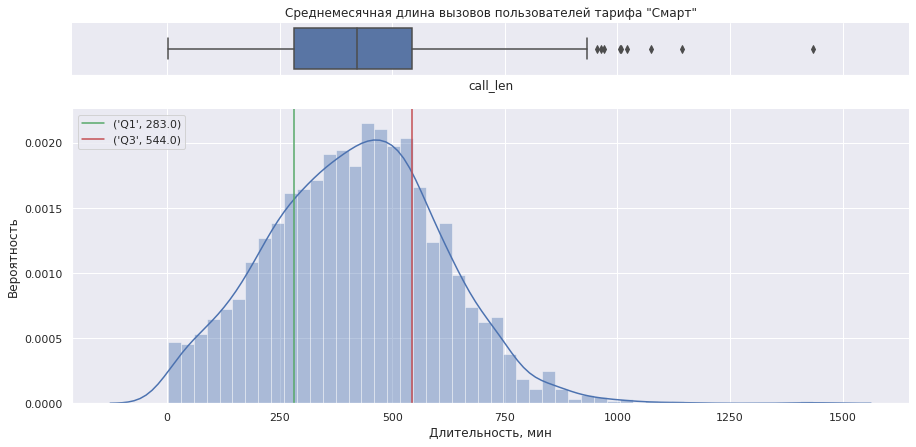

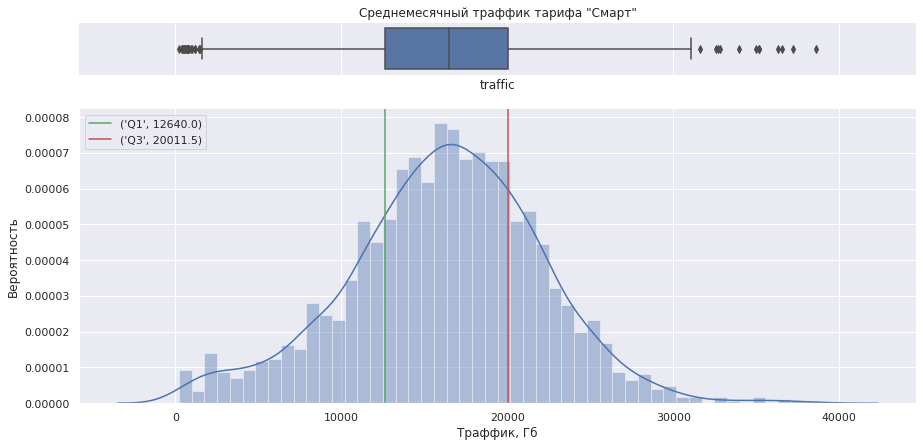

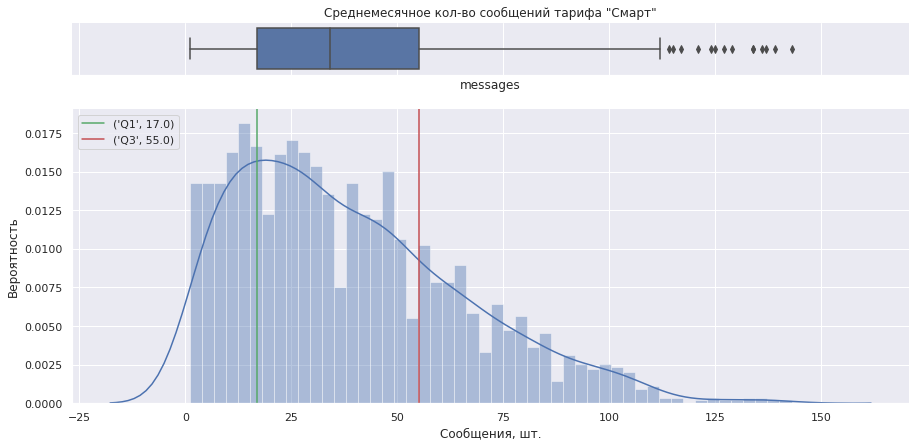

In [330]:
#список рассматриваемых признаков
cols =['call_len', 'traffic', 'messages']
#подписи оси х
xs = ['Длительность, мин', 'Траффик, Гб', 'Сообщения, шт.']
#названия графиков
titles_s = ['Среднемесячная длина вызовов пользователей тарифа "Смарт"','Среднемесячный траффик тарифа "Смарт"',
            'Среднемесячное кол-во сообщений тарифа "Смарт"']

for i in range(0,3):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
    gridspec_kw={"height_ratios": (.15, .85)})

    f.set_size_inches(15, 7)
    #вызываем диаграмму размаха
    sns.boxplot(smart[cols[i]], ax=ax_box).set_title(titles_s[i])
    #вызываем гистограмму, перед этим отбросим NaN, присвоим название графикам из списка
    sns.distplot(smart[cols[i]].dropna(), ax=ax_hist, bins = 50)
    
    #найдем первый и третий квартили
    Q1 = smart[cols[i]].quantile(0.25)
    Q3 = smart[cols[i]].quantile(0.75)
    #присвоим путые значения оси y диаграммы размаха
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
        
    #присвоим осям х названия из списка
    plt.xlabel(xs[i])
    plt.ylabel('Вероятность')
    #выведем вертикальные линии, соответствующие первому и третьему квартилям
    plt.axvline(x = Q1, color='g', label = ('Q1',Q1))
    plt.axvline(x = Q3, color='r', label = ('Q3', Q3))
    #отобразим легенду на графике
    plt.legend(loc='upper left');

По столбцам 'traffic' и 'call_len' наблюдаем нормальные симметричные распределения, большая часть пользователей тратят от примерно 283 до 544 минут в месяц и от 12 до 19,5Гб траффика (попадая в межквартильный размах).
По признаку отправленных сообщений наблюдаем скошенный вправо датасет. Люди отправляют все меньше смс и пользуются мессенджерами.

Получим срез с пользователями тарифа "Ультра".

In [331]:
ultra = data_final.query('tariff == "ultra"')
ultra

,month,user_id,reg_date,tariff,city,call_count,call_len,traffic,messages,revenue
0,2018-08-01,1000,2018-05-25,ultra,Краснодар,42.0,408.0,14070.0,81.0,1950.0
1,2018-11-01,1000,2018-05-25,ultra,Краснодар,37.0,338.0,12153.0,58.0,1950.0
2,2018-10-01,1000,2018-05-25,ultra,Краснодар,44.0,350.0,14717.0,73.0,1950.0
3,2018-06-01,1000,2018-05-25,ultra,Краснодар,28.0,172.0,23257.0,60.0,1950.0
4,2018-09-01,1000,2018-05-25,ultra,Краснодар,46.0,466.0,14581.0,57.0,1950.0
...,...,...,...,...,...,...,...,...,...,...
981,2018-09-01,1495,2018-08-28,ultra,Иркутск,95.0,813.0,33105.0,82.0,2400.0
982,2018-12-01,1495,2018-08-28,ultra,Иркутск,120.0,1031.0,23450.0,84.0,1950.0
983,2018-11-01,1495,2018-08-28,ultra,Иркутск,112.0,954.0,38972.0,79.0,3300.0
984,2018-08-01,1495,2018-08-28,ultra,Иркутск,13.0,92.0,2616.0,13.0,1950.0


Построим гистограммы по признакам 'call_len', 'traffic', 'messages'.

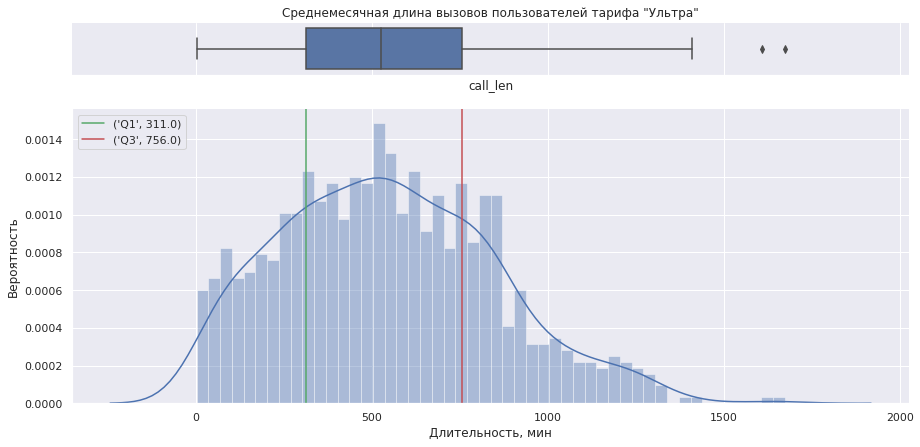

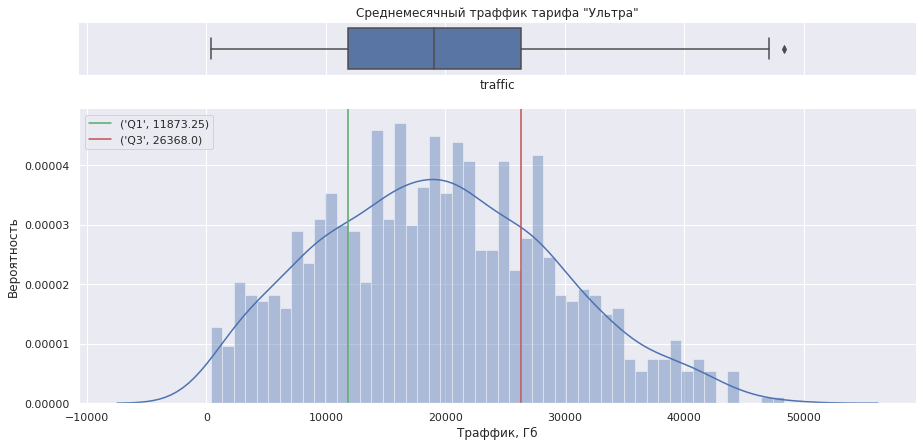

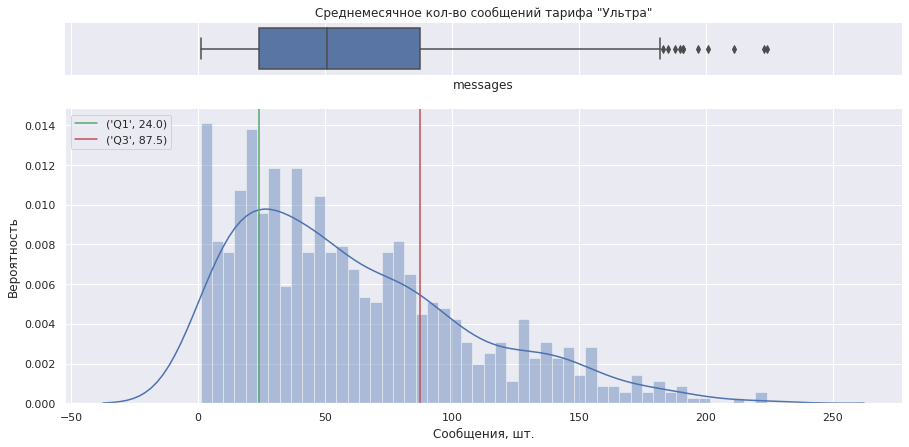

In [332]:
#названия графиков
titles_u = ['Среднемесячная длина вызовов пользователей тарифа "Ультра"','Среднемесячный траффик тарифа "Ультра"',
            'Среднемесячное кол-во сообщений тарифа "Ультра"']

for i in range(0,3):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
    gridspec_kw={"height_ratios": (.15, .85)})

    f.set_size_inches(15, 7)
    #вызываем диаграмму размаха
    sns.boxplot(ultra[cols[i]], ax=ax_box).set_title(titles_u[i])
    #вызываем гистограмму, перед этим отбросим NaN, присвоим название графикам из списка
    sns.distplot(ultra[cols[i]].dropna(), ax=ax_hist, bins = 50)
    
    #найдем первый и третий квартили
    Q1 = ultra[cols[i]].quantile(0.25)
    Q3 = ultra[cols[i]].quantile(0.75)
    #присвоим путые значения оси y диаграммы размаха
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    
    #присвоим осям х названия из списка
    plt.xlabel(xs[i])
    plt.ylabel('Вероятность')
    #выведем вертикальные линии, соответствующие первому и третьему квартилям
    plt.axvline(x = Q1, color='g', label = ('Q1', Q1))
    plt.axvline(x = Q3, color='r', label = ('Q3', Q3))
    #отобразим легенду на графике
    plt.legend(loc='upper left');


По столбцам 'traffic' и 'call_len' наблюдаем нормальные симметричные распределения с менее выраженным пиком, чем в тарифе "Смарт", большая часть пользователей тратят от 311 до 756 минут в месяц и от 11,5 до 25Гб траффика (попадая в межквартильный размах).
<br>
По признаку отправленных сообщений наблюдаем скошенный вправо датасет, аналогичный тарифу "Смарт". При это в тариф "Ультра" включено большое количество сообщений, лимит которых практически никто не расходует. Большинство людей все реже пользуются смс, предпочитая им мессенджеры.

### Вывод

<i> По итогам построенных гистограмм и рассчитанных статистических показателей видим, что среднемесячный объем услуг по всем типам характеризуется нормальным распределением (в случае с признаком 'messages', скошенным вправо). Характер распределения слабо зависит от тарифа, разница больше обусловлена объемами предоставленных услуг. </i>

### Шаг 4. Проверка гипотез <a id='step4'></a>

Проверим, различается ли выручка по тарифам "Смарт" и "Ультра".
Гипотеза Н0 -  средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается. <br>
Альтернативная гипотеза Н1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Для проверки, схожи ли по параметрам совокупности, сравним их дисперсии.

In [333]:
display(smart['revenue'].var())
display(ultra['revenue'].var())

666439.587818946

123174.39328260621

Можно считать, что выборки вызяты из различных по параметрам совокупностей.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind. Параметр equal_var зададим как False, так как выборки взяты из различных по параметрам совокупностей.

In [334]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
            smart['revenue'],
            ultra['revenue'], equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Средняя выручка пользователей тарифов "Смарт" и "Ультра" различается, мы смогли отвергнуть нулевую гипотезу.')
else:
    print('Средняя выручка пользователей тарифов "Смарт" и "Ультра" не различается, мы не смогли отвергнуть нулевую гипотезу.')
    

p-значение: 8.176034394357075e-256
Средняя выручка пользователей тарифов "Смарт" и "Ультра" различается, мы смогли отвергнуть нулевую гипотезу.


Проверим разницу между средней выручкой на конкретных цифрах.

In [335]:
display('Средняя выручка по тарифу Smart: {}' .format(smart['revenue'].mean().astype('int')),
        ('Средняя выручка по тарифу Ultra: {}' .format(ultra['revenue'].mean().astype('int'))))

'Средняя выручка по тарифу Smart: 1285'

'Средняя выручка по тарифу Ultra: 2058'

Действительно, судя по среднему выборок, средняя выручка по тарифам сильно разнится. Тариф Ultra должен быть выгоднее для оператора. Но стоит еще обратить внимание на количество пользователей в выборке: пользователей тарифа Smart в два с лишним разом больше, суммарная прибыль по данному тарифу превышает прибыль тарифа Ultra.

Вторая гипотеза - отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов.<br>
Гипотеза Н0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.<br>
Гипотеза Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [336]:
#получаем срез для признака 'city' не равному 'Москва', то есть в срез попадают остальные регионы
data_regions = data_final.query('city != "Москва"')
#проверим результат
data_regions

,month,user_id,reg_date,tariff,city,call_count,call_len,traffic,messages,revenue
0,2018-08-01,1000,2018-05-25,ultra,Краснодар,42.0,408.0,14070.0,81.0,1950.0
1,2018-11-01,1000,2018-05-25,ultra,Краснодар,37.0,338.0,12153.0,58.0,1950.0
2,2018-10-01,1000,2018-05-25,ultra,Краснодар,44.0,350.0,14717.0,73.0,1950.0
3,2018-06-01,1000,2018-05-25,ultra,Краснодар,28.0,172.0,23257.0,60.0,1950.0
4,2018-09-01,1000,2018-05-25,ultra,Краснодар,46.0,466.0,14581.0,57.0,1950.0
...,...,...,...,...,...,...,...,...,...,...
3211,2018-07-01,1498,2018-07-19,smart,Владикавказ,20.0,175.0,7486.0,20.0,550.0
3212,2018-11-01,1499,2018-09-27,smart,Пермь,62.0,612.0,16696.0,59.0,1313.0
3213,2018-09-01,1499,2018-09-27,smart,Пермь,8.0,70.0,1848.0,11.0,550.0
3214,2018-10-01,1499,2018-09-27,smart,Пермь,44.0,449.0,17809.0,48.0,1150.0


In [337]:
#получаем срез для признака 'city' равному 'Москва'
data_moscow = data_final.query('city == "Москва"')
#проверим результат
data_moscow

,month,user_id,reg_date,tariff,city,call_count,call_len,traffic,messages,revenue
8,2018-09-01,1003,2018-08-17,ultra,Москва,105.0,961.0,12479.0,91.0,1950.0
9,2018-11-01,1003,2018-08-17,ultra,Москва,95.0,824.0,11368.0,94.0,1950.0
10,2018-12-01,1003,2018-08-17,ultra,Москва,88.0,802.0,10132.0,75.0,1950.0
11,2018-10-01,1003,2018-08-17,ultra,Москва,97.0,855.0,13445.0,83.0,1950.0
12,2018-08-01,1003,2018-08-17,ultra,Москва,43.0,380.0,8571.0,37.0,1950.0
...,...,...,...,...,...,...,...,...,...,...
3176,2018-10-01,1490,2018-04-03,smart,Москва,34.0,312.0,20690.0,45.0,1750.0
3177,2018-11-01,1490,2018-04-03,smart,Москва,31.0,282.0,18733.0,47.0,1350.0
3178,2018-05-01,1490,2018-04-03,smart,Москва,39.0,339.0,21362.0,37.0,1750.0
3179,2018-04-01,1490,2018-04-03,smart,Москва,31.0,270.0,13684.0,38.0,550.0


Для проверки, схожи ли по параметрам совокупности, сравним их дисперсии.

In [338]:
display(data_moscow['revenue'].var())
display(data_regions['revenue'].var())

550956.9911512972

644556.544164153

Можно считать, что выборки вызяты из схожих по параметрам совокупностей.<br>

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind. Параметр equal_var зададим как True, так как выборки взяты из схожих по параметрам совокупностей.

In [339]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
results1 = st.ttest_ind(
            data_moscow['revenue'],
            data_regions['revenue'], equal_var = True)
print('p-значение:', results1.pvalue)

if (results1.pvalue < alpha):
    print('Средняя выручка пользователей из Москвы  отличается от выручки пользователей из других регионов, мы  смогли отвергнуть гипотезу.')
else:
    print('Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, мы не смогли отвергнуть гипотезу.')

p-значение: 0.5880464605032956
Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, мы не смогли отвергнуть гипотезу.


Проверим разницу между средней выручкой на конкретных цифрах.

In [345]:
results2 = st.levene(
            data_moscow['revenue'],
            data_regions['revenue'])
print('p-значение:', results2.pvalue)

p-значение: 0.005429633832323278


In [340]:
display('Средняя выручка по Москве: {}'.format(data_moscow['revenue'].mean().astype('int')),
        ('Средняя выручка по регионам: {}'.format(data_regions['revenue'].mean().astype('int'))))

'Средняя выручка по Москве: 1538'

'Средняя выручка по регионам: 1518'

Судя по средним значениям выборок, средняя выручка практически не зависит от региона.

### Вывод

<i> Были проверены гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind.
Гипотеза о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт» была отвергнута, гипотезу о равенстве средней выручки пользователей из Москвы и регионов мы не смогли отвергнуть. </i>

### Шаг 5. Общий вывод <a id='step5'></a>

<i> Мной была проведена работа по исследованию перспективного тарифа телеком компании. Были расмотрены пропуски в столбцах, заменены типы данных в тех столбцах, где это требовалось для дальнейшего удобства работы над проектом, удалены выбросы и артефакты.

Данные были сгруппированы методом pivot_table, объединены функций merge, произведены и занесены в датафреймы необходимые рассчеты, такие как помесячная выручка с каждого пользователя.

По сгрупированным по тарифам датафреймам были рассчитаны статистические параметры, построены гистрограмы, проанализированы распределения. По всем услугам распределения случайных величин оказались нормальными, для отправленных сообщений - скошенными вправо, возможно из-за тенденции к уменьшению использования смс в ползу мессенджеров. Пик распределени для тарифа "Ультра" несколько более сглажен, данный тариф выбирают люди, которые пользуются услугами в большем объеме, объемы эти зачастую велики и сильнее разнятся, чем в более экономном тарифе "Смарт".

Были проверены гипотезы о различии средней выручки между тарифами и жителями Москвы и регионов.
Гипотеза о равенстве выручки между тарифами была отвергнута, это было предсказуемо хотя бы из-за большой разницы в абонентской плате.
Гипотеза о равенстве выручки между Москвой и регионами не смогла быть отвергнута. Возможно, в Москве более экономные люди, или тариф выбирают с умом.
С точки зрения средней прибыли с клиента тариф "Ультра" более выгоден, но общая прибыль по тарифу "Смарт" в данной выборе выше из-за большего количества пользователей. Как мне кажется, оба тарифа по-своему выгодны для оператора.
</i>

